# Exploratory Data Analysis Workbook


**Zillow:**

Zillow is an online real estate database company founded in 2006 - Wikipedia

**Zestimate:**

“Zestimates” are estimated home values based on 7.5 million statistical and machine learning models that analyze hundreds of data points on each property. And, by continually improving the median margin of error (from 14% at the onset to 5% today),

**Objective:**

Building a model to improve the Zestimate residual error.

The competition is in two stages. This public competition will go on till Jan 2018 and has $50,000 in prize. Please make sure to read about the [Prize details][1] and [Competition overview][2] since it is quite different in this one.

Let us first import the necessary modules.


  [1]: https://www.kaggle.com/c/zillow-prize-1#prizes
  [2]: https://www.kaggle.com/c/zillow-prize-1#Competition%20Overview

### Import Necessary Packages

In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import folium
import missingno as msno
%matplotlib inline

In [10]:
org=pd.read_csv('zillow_train_data.csv')

In [4]:
print (org.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90275 entries, 0 to 90274
Data columns (total 62 columns):
parcelid                        90275 non-null int64
logerror                        90275 non-null float64
transactiondate                 90275 non-null object
airconditioningtypeid           28781 non-null float64
architecturalstyletypeid        261 non-null float64
basementsqft                    43 non-null float64
bathroomcnt                     90275 non-null float64
bedroomcnt                      90275 non-null float64
buildingclasstypeid             16 non-null float64
buildingqualitytypeid           57364 non-null float64
calculatedbathnbr               89093 non-null float64
decktypeid                      658 non-null float64
finishedfloor1squarefeet        6856 non-null float64
calculatedfinishedsquarefeet    89614 non-null float64
finishedsquarefeet12            85596 non-null float64
finishedsquarefeet13            33 non-null float64
finishedsquarefeet15        

## Missing Values

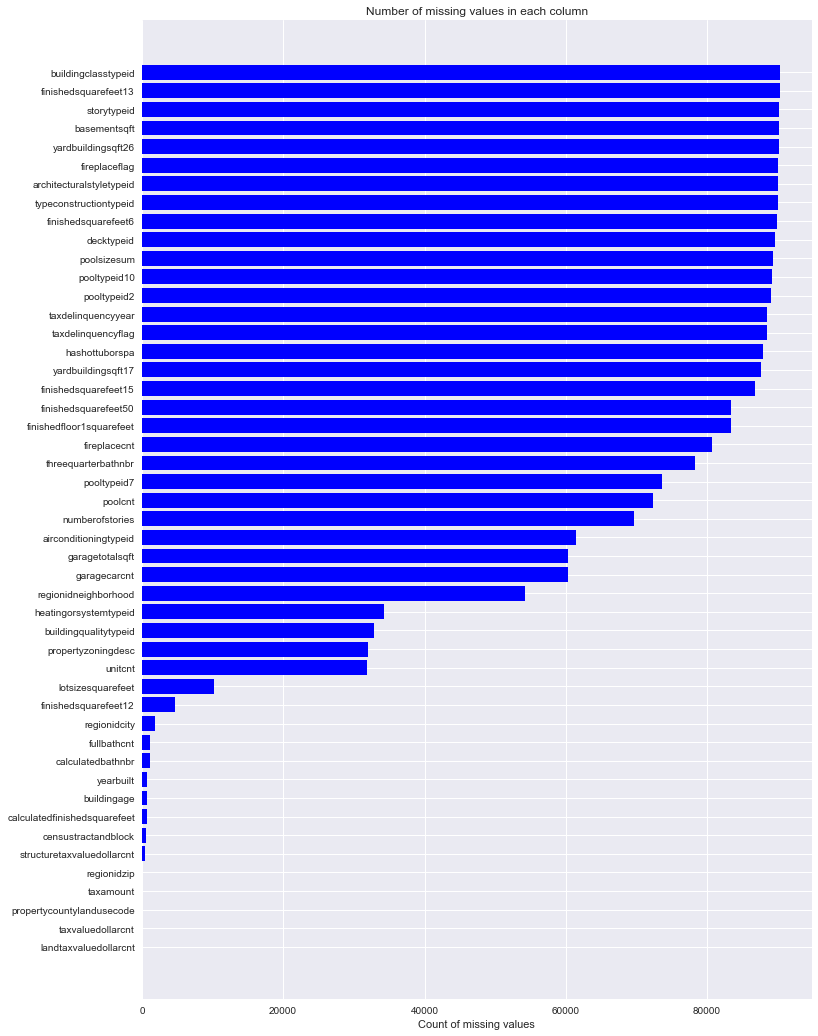

In [4]:
missing_df = org.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

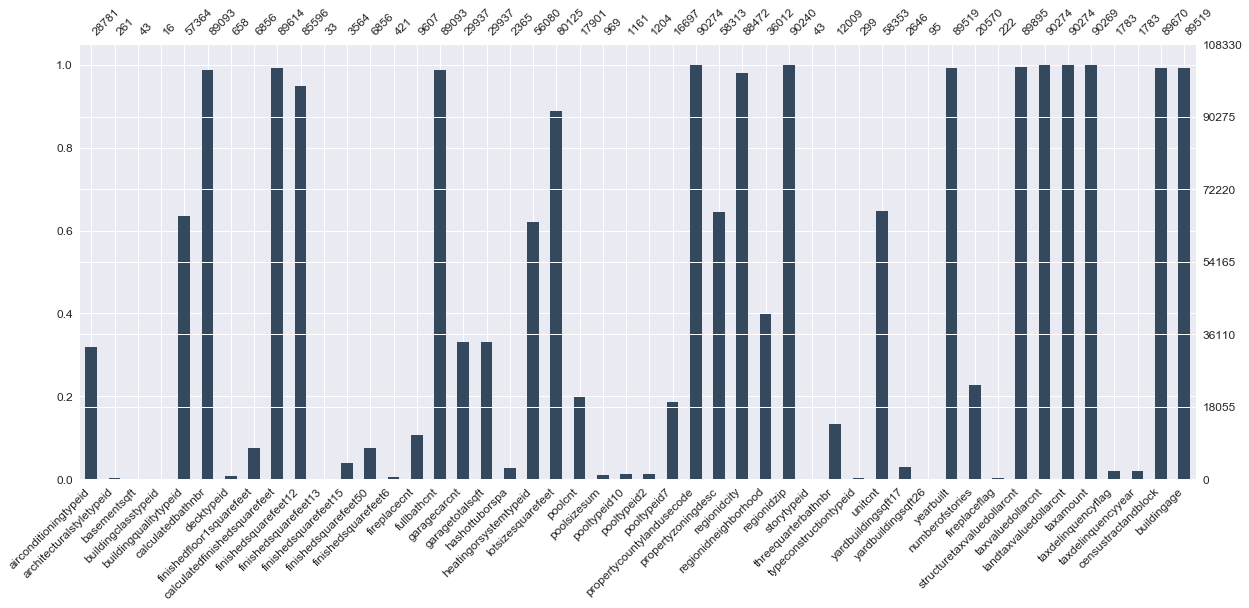

In [8]:
missingValueColumns = org.columns[org.isnull().any()].tolist()
msno.bar(org[missingValueColumns],\
            figsize=(20,8),color="#34495e",fontsize=12,labels=True,)

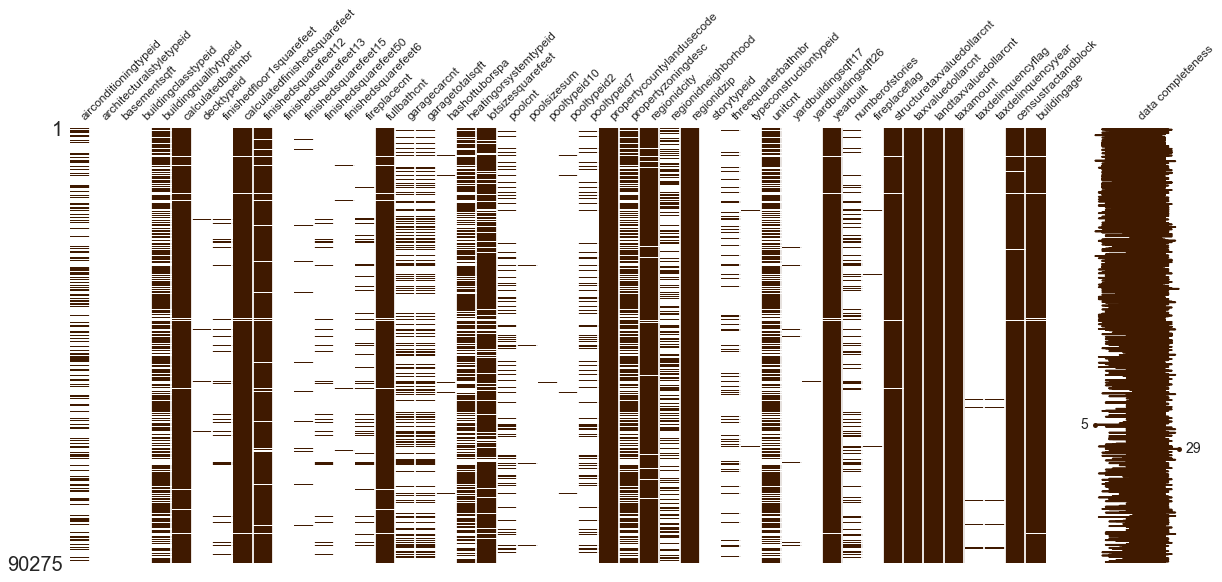

In [22]:
msno.matrix(org[missingValueColumns],width_ratios=(10,1),\
            figsize=(20,8),color=(0.25,0.1, 0),fontsize=12,sparkline=True,labels=True)
plt.savefig('Datacompleteness.png')
plt.show()

## Distribution of the Target

C:\Users\assad\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


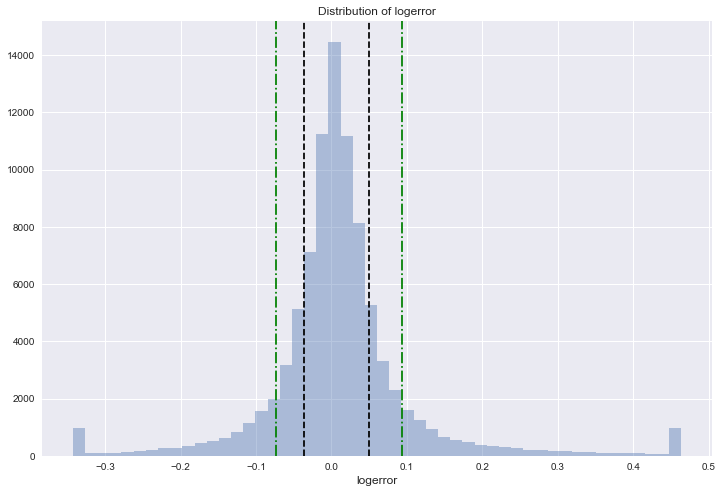

In [14]:
ulimit = np.percentile(df_train.logerror.values, 99)
llimit = np.percentile(df_train.logerror.values, 1)
df_train['logerror'].loc[df_train['logerror']>ulimit] = ulimit
df_train['logerror'].loc[df_train['logerror']<llimit] = llimit

plt.figure(figsize=(12,8))
sns.distplot(df_train.logerror.values, bins=50, kde=False);

plt.title('Distribution of logerror')
plt.xlabel('logerror', fontsize=12)
plt.axvline(x=0.05,color='k', linestyle='--')
plt.axvline(x=-0.036,color='k', linestyle='--')
plt.axvline(x=0.094,color='g', linestyle='-.')
plt.axvline(x=-0.074,color='g', linestyle='-.')

plt.savefig('Logerrordistribution.png')
plt.show()

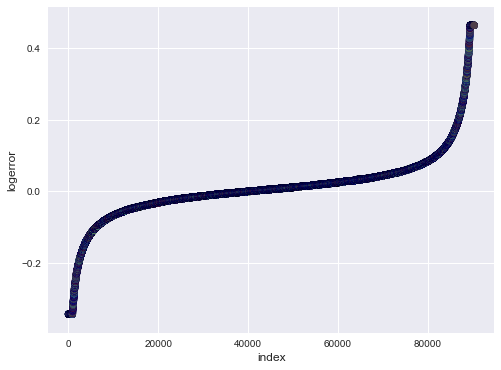

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(range(org.shape[0]), np.sort(org.logerror.values),c=org['errrange'],cmap='jet',alpha=0.2)
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

### Continuous Variable Analysis

In [23]:
continuous = ['basementsqft', 'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet', 
              'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
              'finishedsquarefeet50', 'finishedsquarefeet6', 'garagetotalsqft', 'latitude',
              'longitude', 'lotsizesquarefeet', 'poolsizesum',  'yardbuildingsqft17',
              'yardbuildingsqft26', 'yearbuilt', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
              'landtaxvaluedollarcnt', 'taxamount']

discrete = ['bathroomcnt', 'bedroomcnt', 'calculatedbathnbr', 'fireplacecnt', 'fullbathcnt',
            'garagecarcnt', 'poolcnt', 'roomcnt', 'threequarterbathnbr', 'unitcnt',
            'numberofstories', 'assessmentyear', 'taxdelinquencyyear']

In [4]:
df_train=org

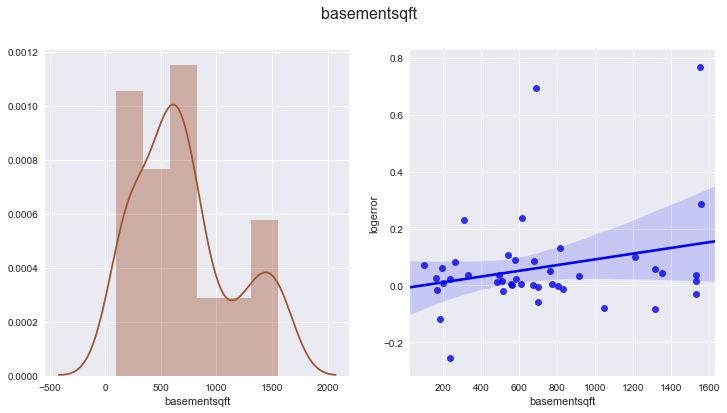

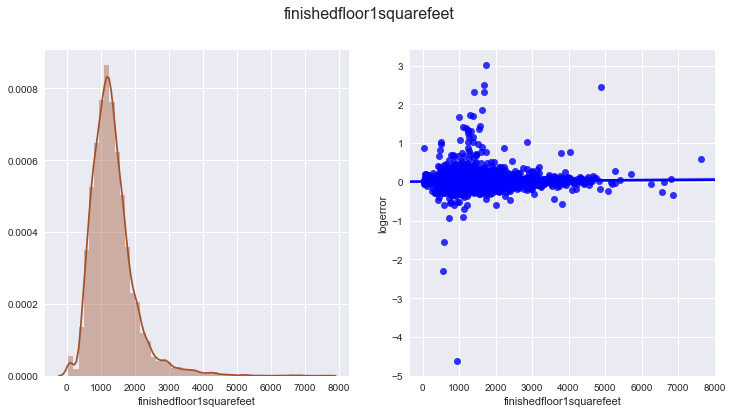

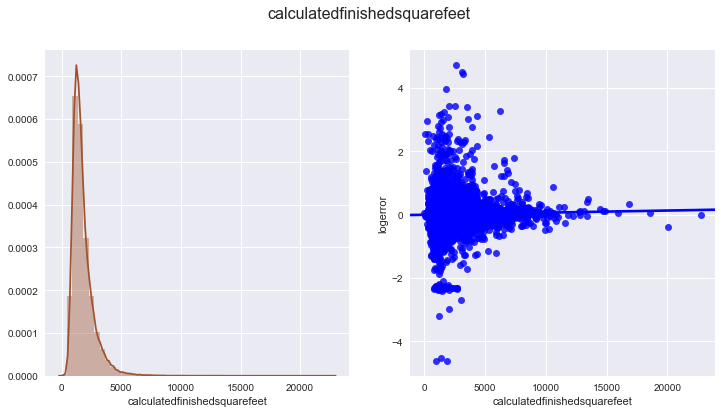

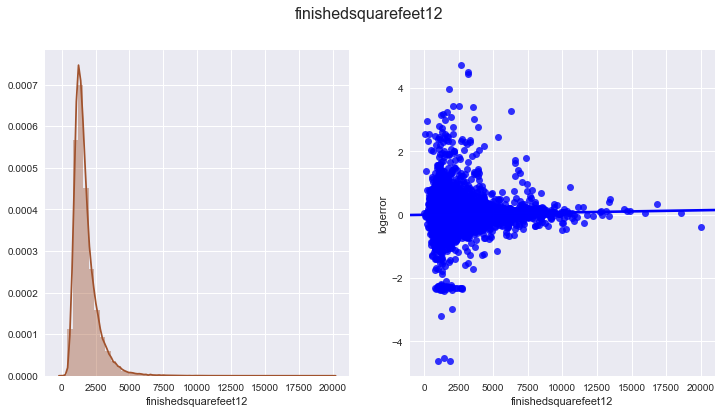

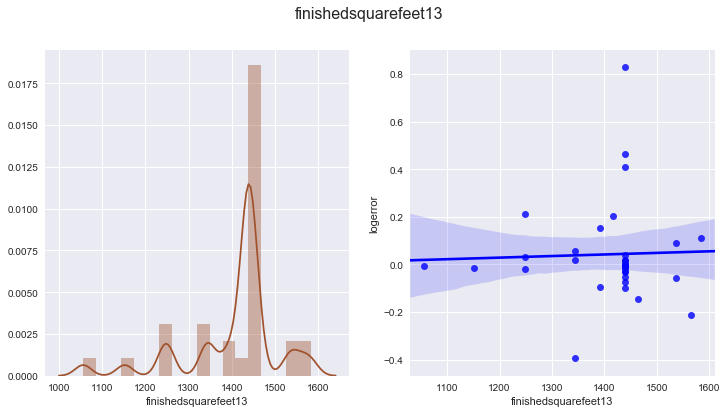

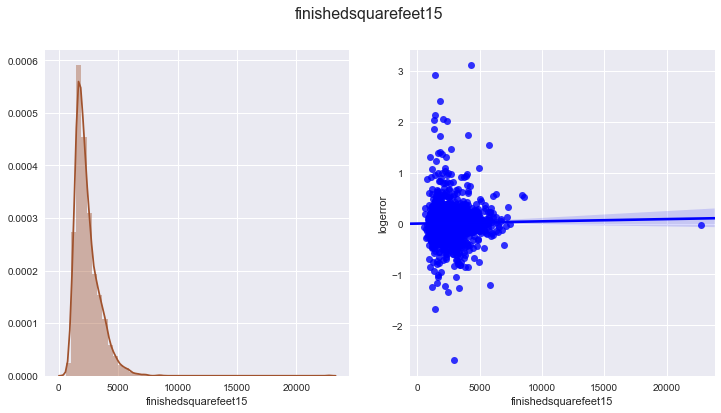

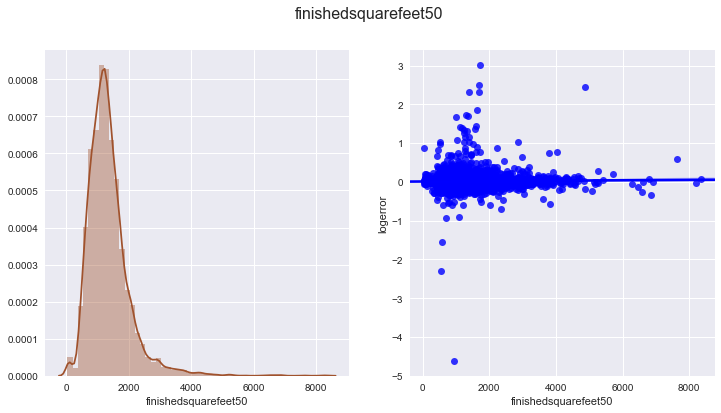

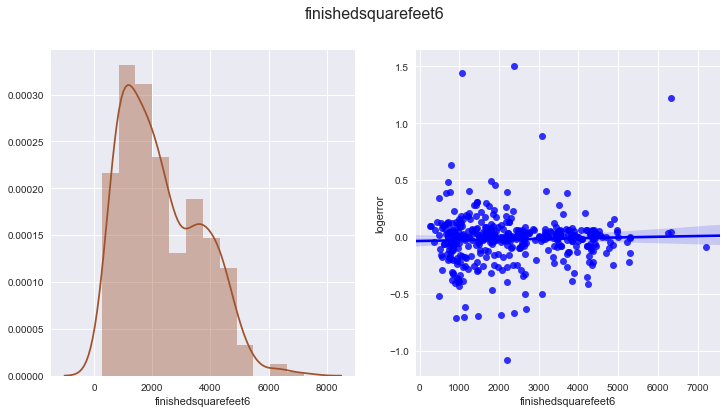

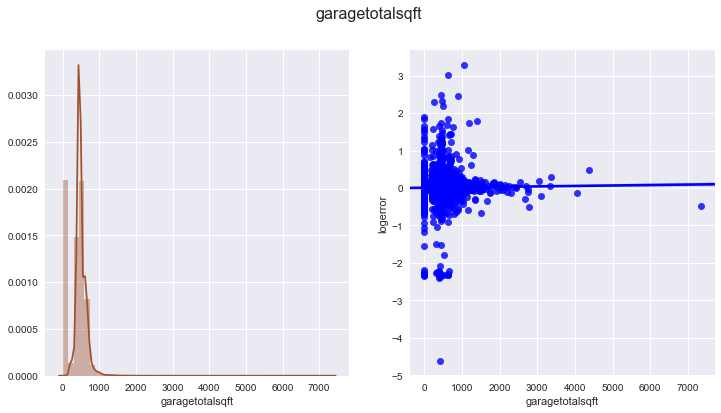

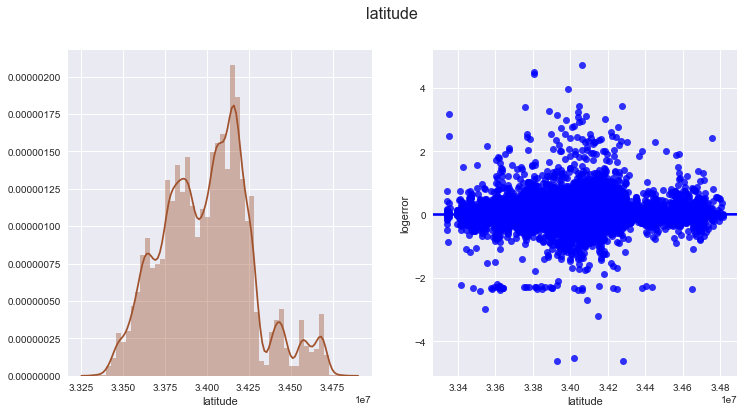

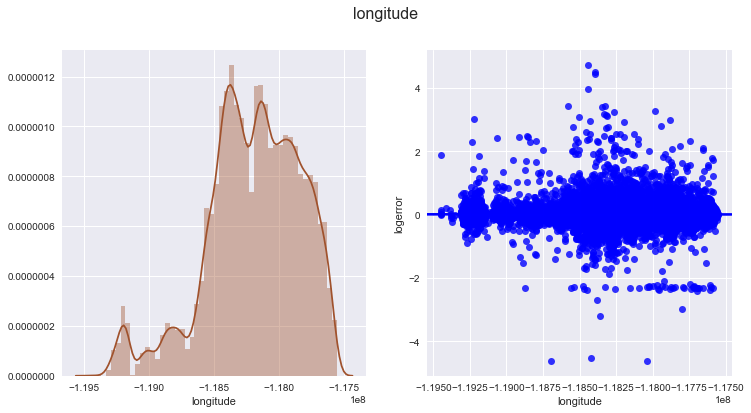

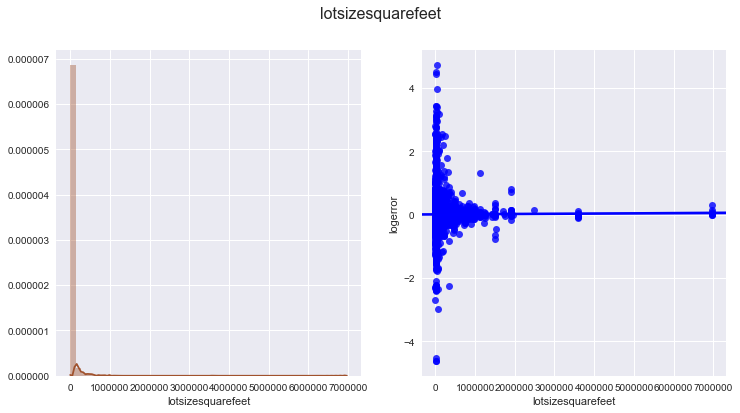

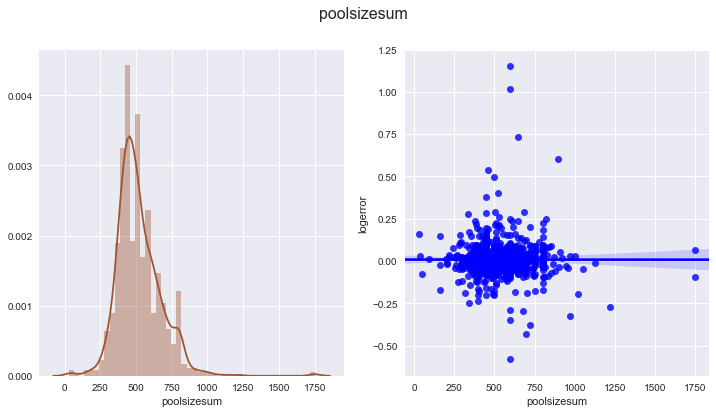

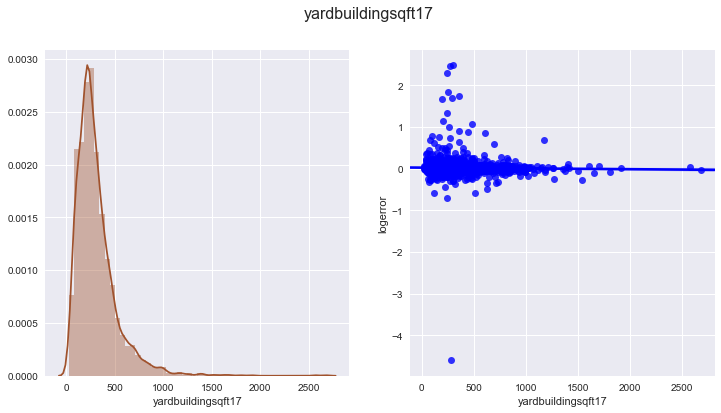

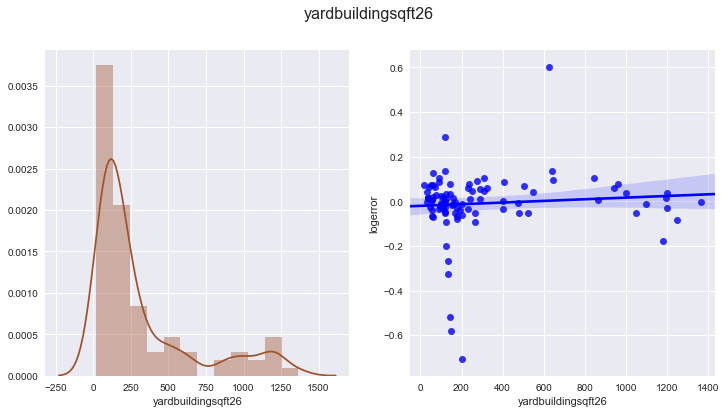

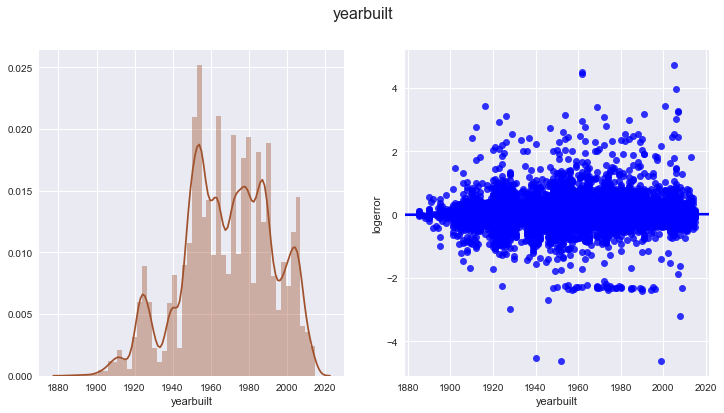

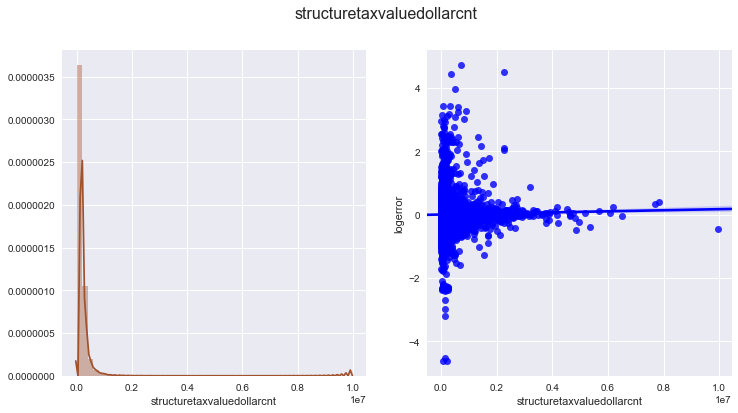

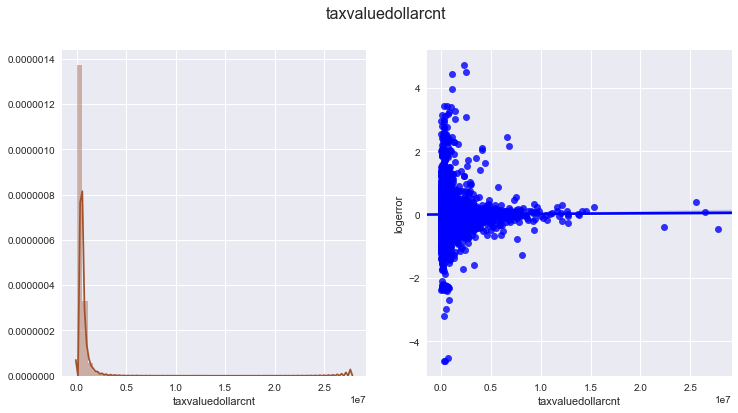

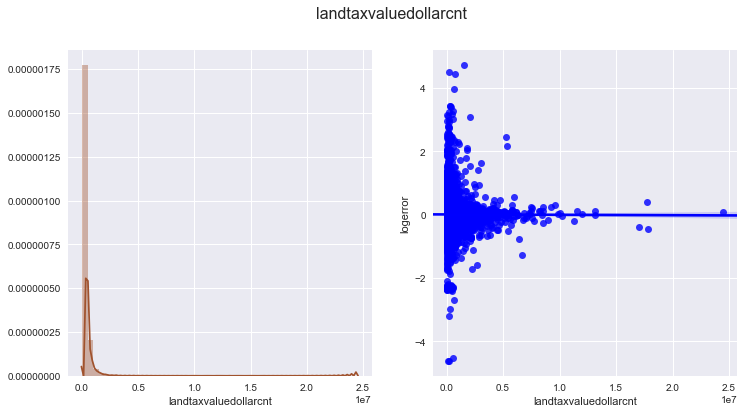

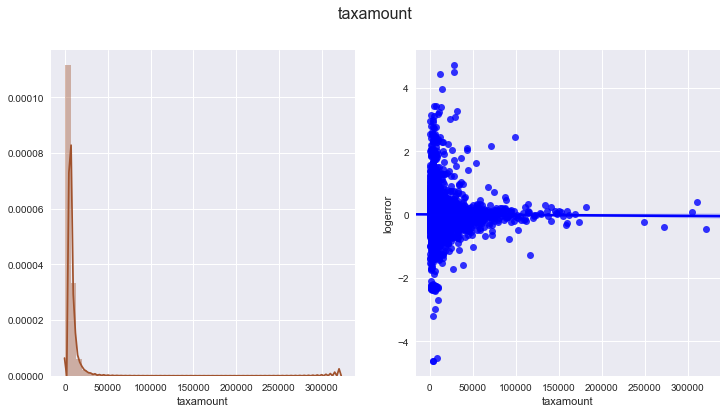

In [13]:
### Continuous variable plots
for col in continuous:
    xx=df_train[df_train[col].notnull()][['logerror',col]]
    fig = plt.figure(figsize=(12,6));
    sns.distplot(xx[col], color='Sienna', ax = plt.subplot(121));
    sns.regplot(xx[col], y=xx['logerror'],color='blue', ax = plt.subplot(122));
    plt.suptitle(col, fontsize=16)
    del xx

### Discrete Feature Analysis

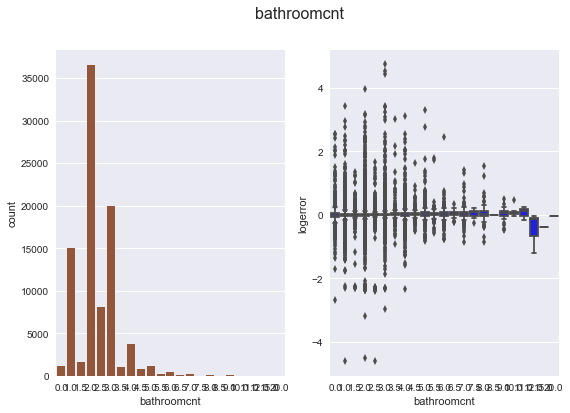

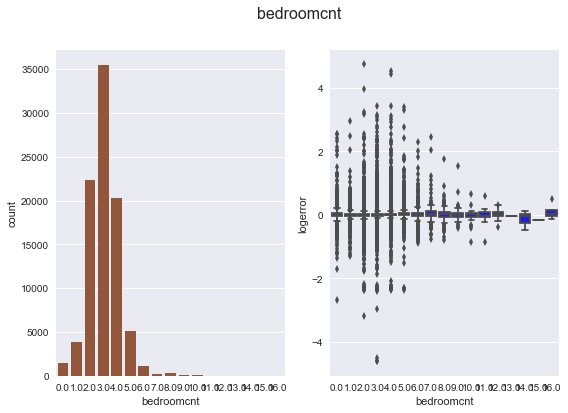

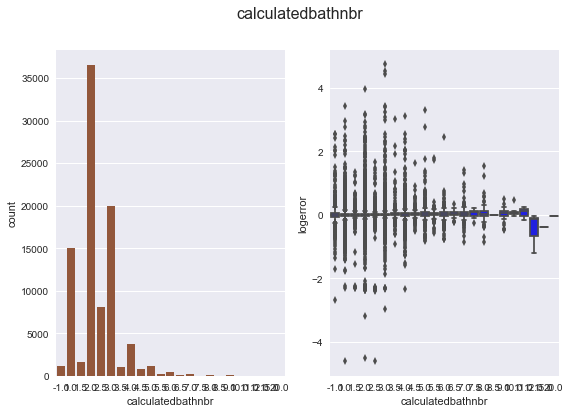

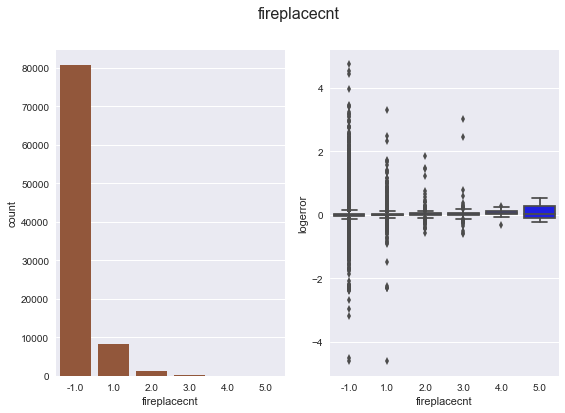

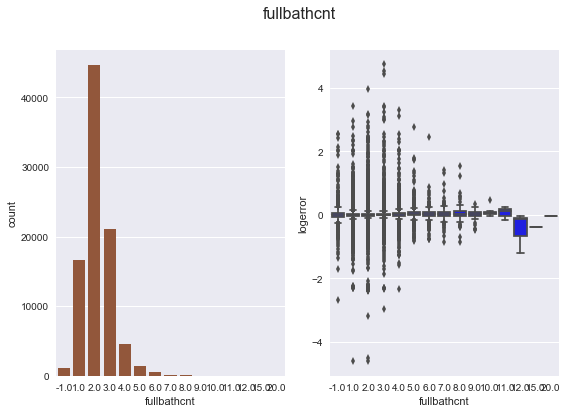

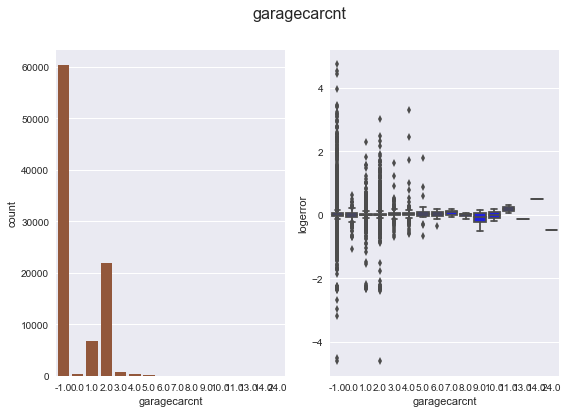

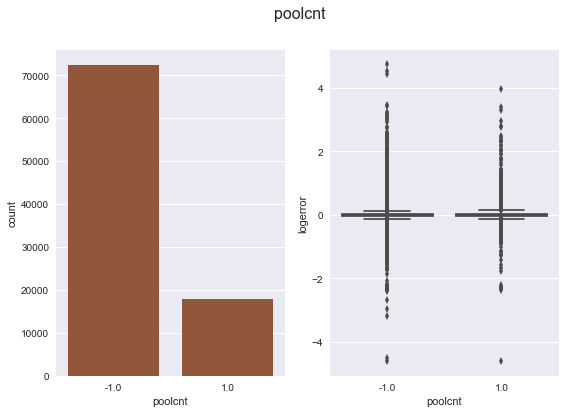

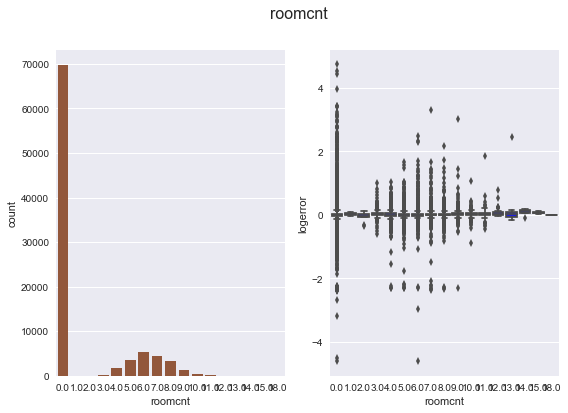

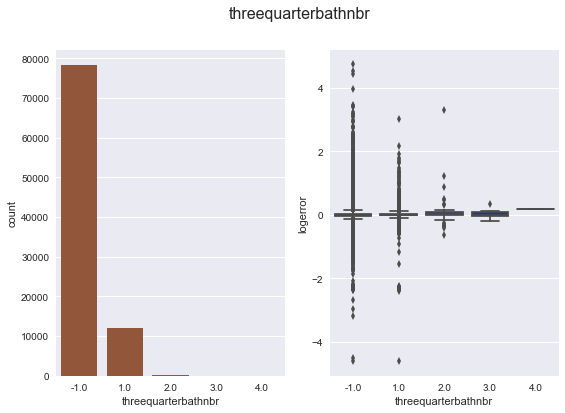

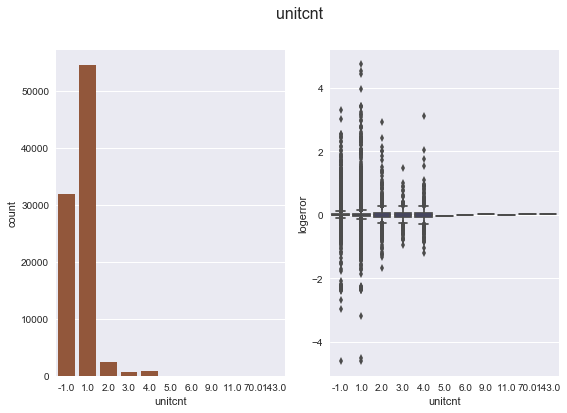

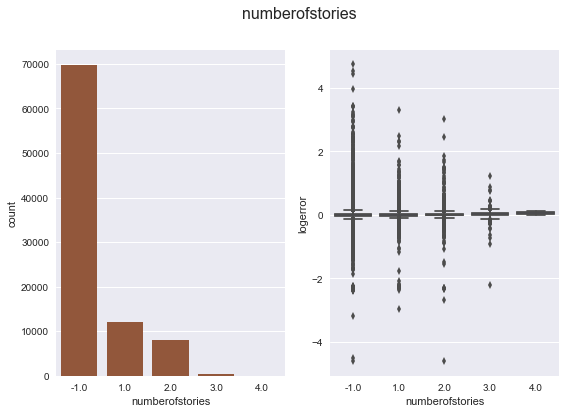

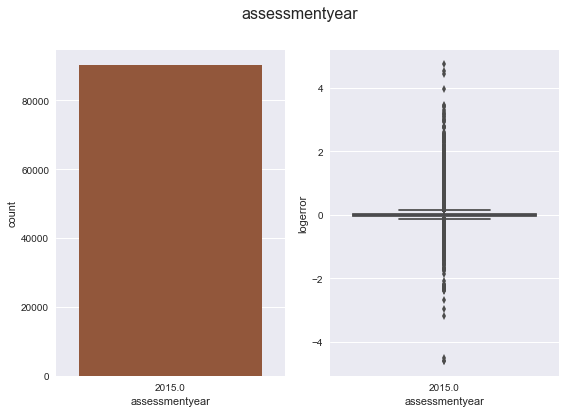

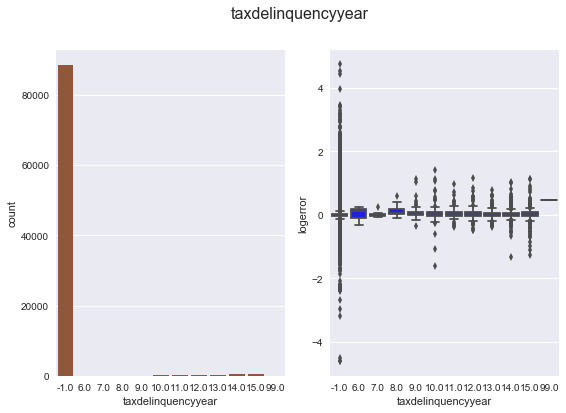

In [30]:
### Discrete variable plots

for col in discrete:
    org[col].fillna(-1, inplace=True)
    values = org[col].dropna()   
    fig = plt.figure(figsize=(9,6));
    sns.countplot(x=values, color='Sienna', ax = plt.subplot(121));
    sns.boxplot(x=org[col],y=org['logerror'], color='blue', ax = plt.subplot(122));
    plt.suptitle(col, fontsize=16)

### Check Location Impact

In [19]:
from ggplot import *

C:\Users\assad\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\assad\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\assad\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


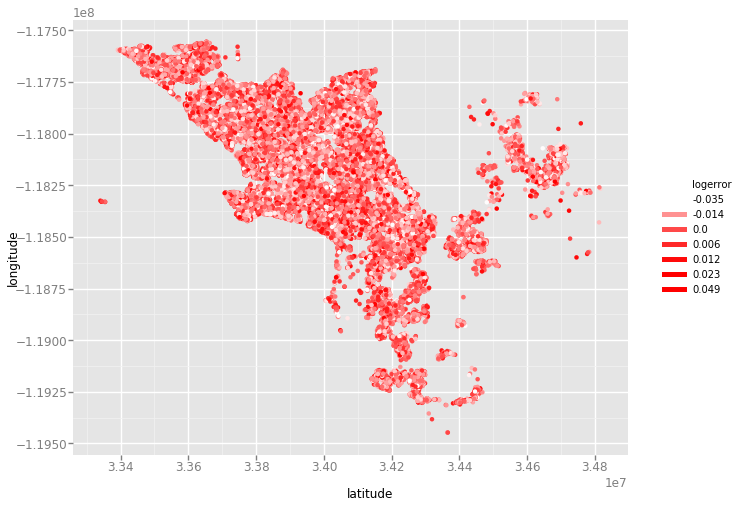

<ggplot: (-9223371888966482898)>

In [23]:
ggplot(aes(x='latitude', y='longitude', color='logerror'), df_train[df_train['errrange']==1]) + \
    geom_point(alpha=0.1)+scale_color_gradient(low = 'white', high = 'red')+geom_jitter()

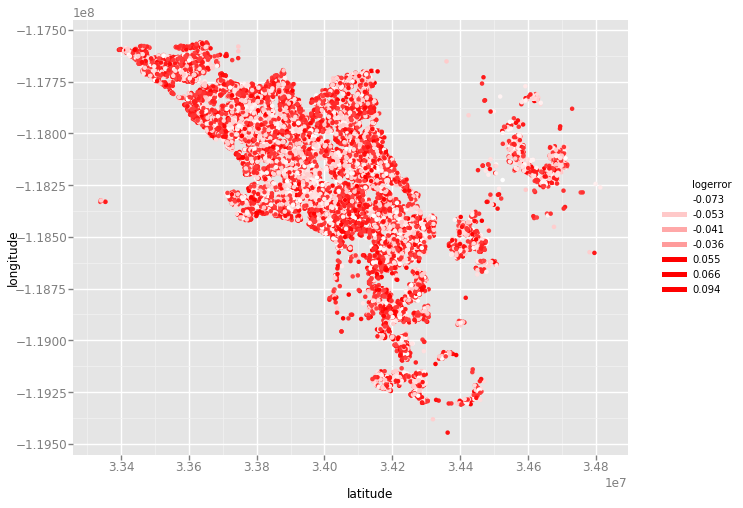

<ggplot: (-9223371888966482379)>

In [22]:
ggplot(aes(x='latitude', y='longitude', color='logerror'), df_train[df_train['errrange']==2]) + \
    geom_point(alpha=0.1)+scale_color_gradient(low = 'white', high = 'red')+geom_jitter()

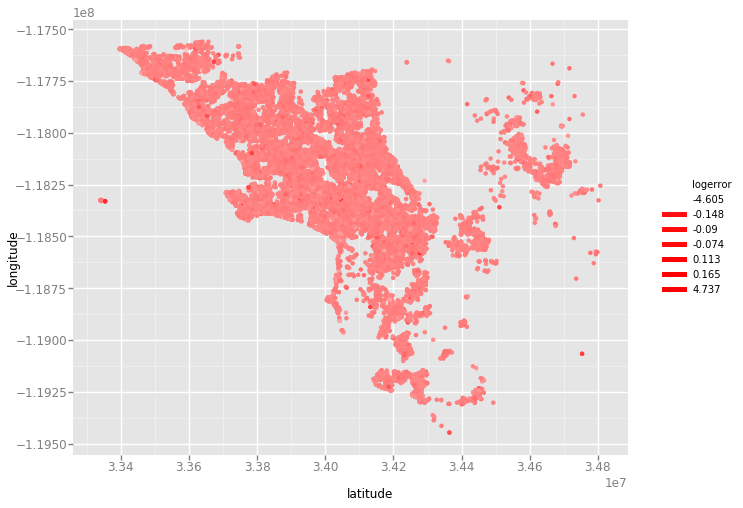

<ggplot: (147886949275)>

In [21]:
df_train=org
ggplot(aes(x='latitude', y='longitude', color='logerror'), df_train[df_train['errrange']==3]) + \
    geom_point(alpha=0.1)+scale_color_gradient(low = 'white', high = 'red')+geom_jitter()

In [11]:
from folium.plugins import MarkerCluster

In [21]:
geo_df_1=org[['latitude', 'longitude','logerror','errrange']][org['errrange']==1]
geo_df_1[['longitude']]/=1e6
geo_df_1[['latitude']]/=1e6

In [22]:
geo_df_1.dropna(subset=['latitude','longitude'], axis=0 ,inplace=True)

In [23]:
SF_COORDINATES=(34.088537, -118.249923)

# create empty map zoomed in 
map_1 = folium.Map(location=SF_COORDINATES, zoom_start=9)
marker_cluster = MarkerCluster().add_to(map_1)
MAX_RECORDS = 1000
# add a marker for every record
for each in geo_df_1[0:MAX_RECORDS].iterrows():
    
    folium.Marker([each[1]['latitude'],each[1]['longitude']],icon=folium.Icon(color='green')).add_to(marker_cluster)
 
display(map_1)

In [24]:
del geo_df_1
del map_1

In [16]:
geo_df_2=org[['latitude', 'longitude','logerror','errrange']][org['errrange']==2]
geo_df_2[['longitude']]/=1e6
geo_df_2[['latitude']]/=1e6

In [19]:
SF_COORDINATES=(34.088537, -118.249923)

# create empty map zoomed in 
map_2 = folium.Map(location=SF_COORDINATES, zoom_start=9)
marker_cluster = MarkerCluster().add_to(map_2)
MAX_RECORDS = 1000
# add a marker for every record
for each in geo_df_2[0:MAX_RECORDS].iterrows():
    
    folium.Marker([each[1]['latitude'],each[1]['longitude']],icon=folium.Icon(color='red')).add_to(marker_cluster)
 
display(map_2)

In [20]:
del geo_df_2
del map_2

In [25]:
geo_df_3=org[['latitude', 'longitude','logerror','errrange']][org['errrange']==3]
geo_df_3[['longitude']]/=1e6
geo_df_3[['latitude']]/=1e6

In [26]:
SF_COORDINATES=(34.088537, -118.249923)

# create empty map zoomed in 
map_3 = folium.Map(location=SF_COORDINATES, zoom_start=9)
marker_cluster = MarkerCluster().add_to(map_3)
MAX_RECORDS = 1000
# add a marker for every record
for each in geo_df_3[0:MAX_RECORDS].iterrows():
    
    folium.Marker([each[1]['latitude'],each[1]['longitude']],icon=folium.Icon(color='red')).add_to(marker_cluster)
 
display(map_3)

In [27]:
del geo_df_3
del map_3

### Checking correlation among Features

In [ ]:
df_train=org

In [33]:
for i,col in enumerate(df_train.columns):
    nanValues = np.sum(df_train[col].isnull()) / org.shape[0]
    if nanValues > .75:
        df_train = df_train.drop(col, axis=1)
    

In [39]:
for col in df_train.columns:
    if df_train[col].dtype == 'object':
        df_train=df_train.drop(col,axis=1)

In [44]:
corr = df_train.corr()


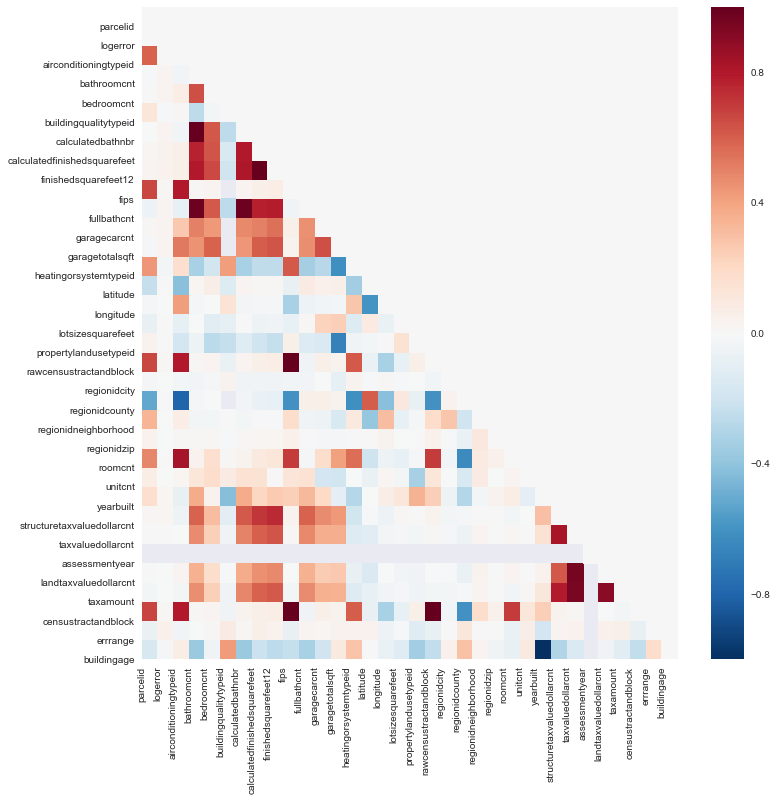

In [53]:
low = np.tril(corr, k = -1)

new = corr.columns.tolist()
new.reverse()
new
plt.figure(figsize=(12,12))
sns.heatmap(low);
plt.xticks(np.arange(len(low)), corr.columns, rotation = '90')
plt.yticks(np.arange(len(low)), new, rotation = '0')
plt.show()

C:\Users\assad\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


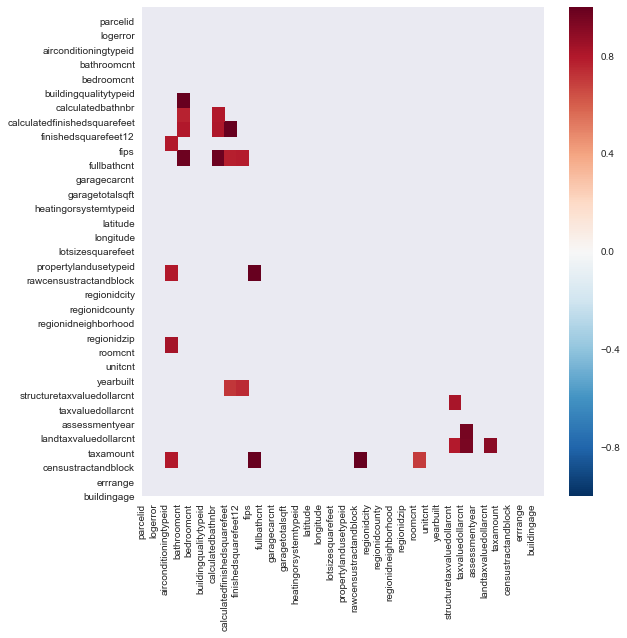

In [58]:
thresh = low > 0.7
plt.figure(figsize=(9,9))
sns.heatmap(low, mask = 1 - thresh)
plt.xticks(np.arange(len(low)), corr.columns, rotation = '90');
plt.yticks(np.arange(len(low)), new, rotation = '0');

C:\Users\assad\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


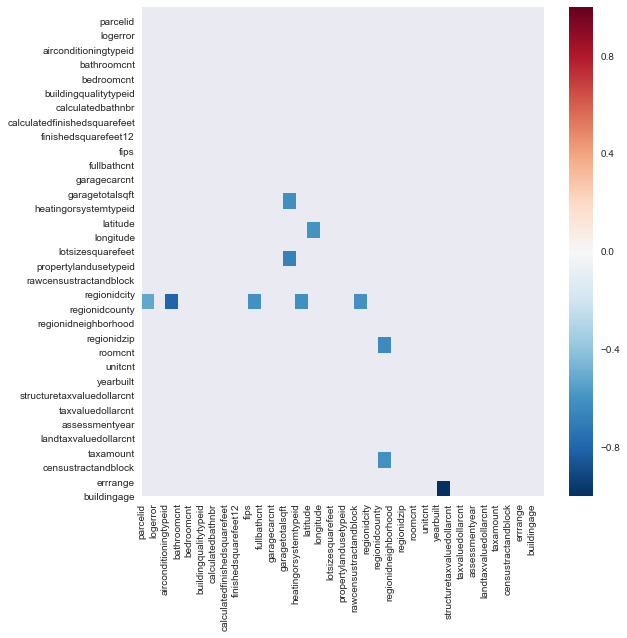

In [60]:
thresh = low < -0.5
plt.figure(figsize=(9,9))
sns.heatmap(low, mask = 1 - thresh)
plt.xticks(np.arange(len(low)), corr.columns, rotation = '90');
plt.yticks(np.arange(len(low)), new, rotation = '0');

In [5]:
from ggplot import *;

C:\Users\assad\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\assad\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\assad\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


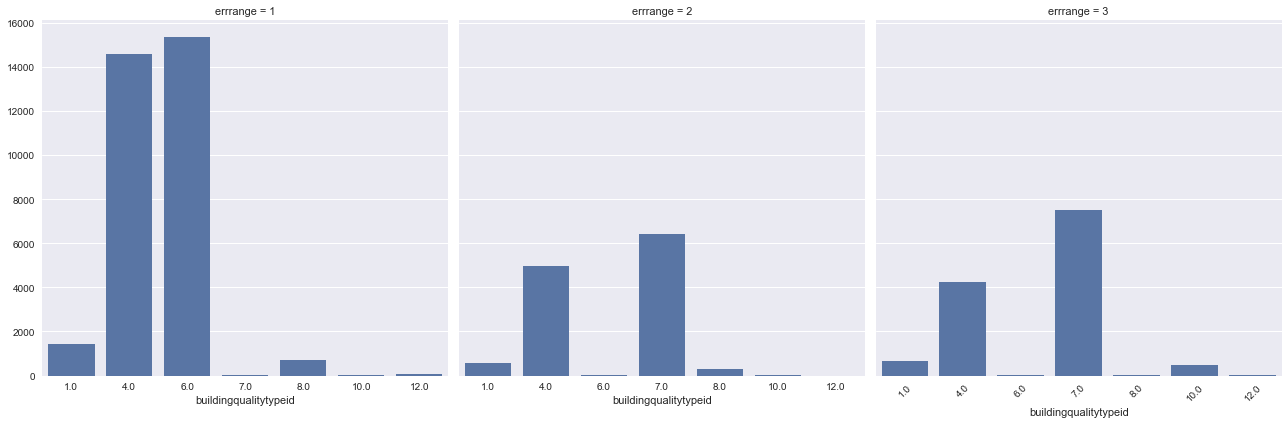

In [45]:
g = sns.FacetGrid(df_train, col = 'errrange',col_wrap=3,size=6)
plt.xticks(rotation=45)
g.map(sns.countplot, 'buildingqualitytypeid')
plt.tight_layout()

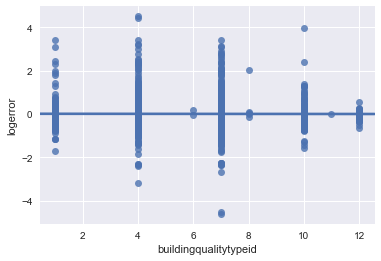

In [49]:
sns.regplot(x='buildingqualitytypeid',y='logerror',data=df_train);

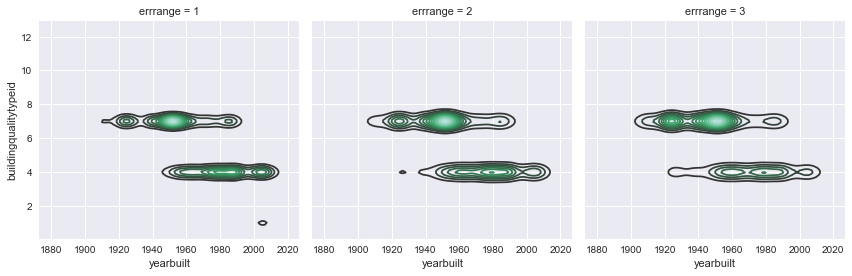

In [53]:
sns.set(style="darkgrid")

g = sns.FacetGrid(df_train, col = 'errrange',size=4)

g.map(sns.kdeplot,"yearbuilt", "buildingqualitytypeid",n_levels=15)
plt.tight_layout()

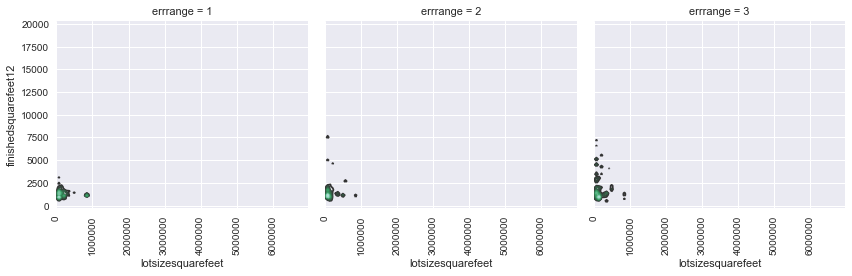

In [59]:
sns.set(style="darkgrid")

g = sns.FacetGrid(df_train, col = 'errrange',size=4)

g.map(sns.kdeplot,"lotsizesquarefeet", "finishedsquarefeet12",n_levels=15)
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)
plt.tight_layout()

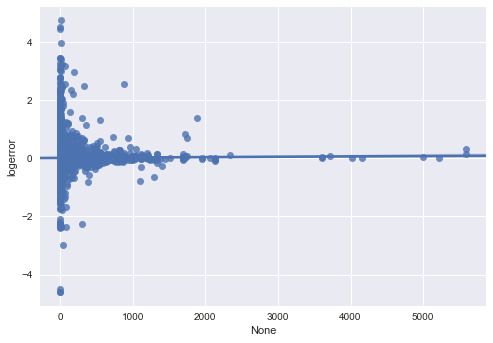

In [74]:
ratio1=df_train['lotsizesquarefeet']/df_train['finishedsquarefeet12']
sns.regplot(x=ratio1,y=df_train['logerror']);


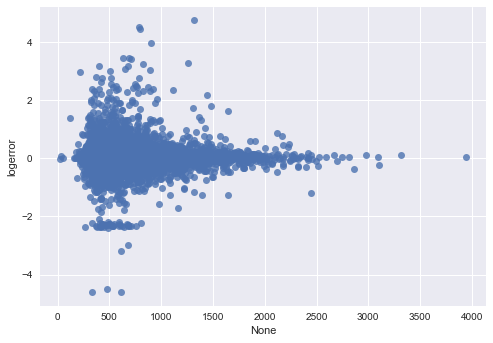

In [106]:
ratio2=df_train['finishedsquarefeet12']/df_train['bedroomcnt']
sns.regplot(x=ratio2,y=df_train['logerror']);

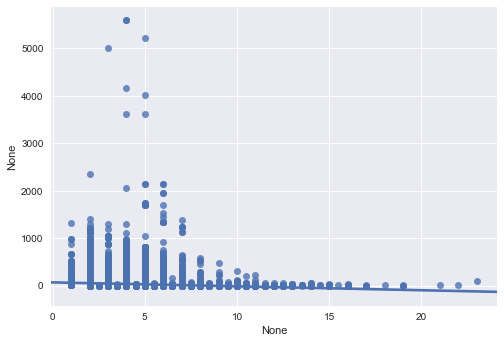

In [115]:
totroom=(df_train['bedroomcnt']+df_train['calculatedbathnbr'])
sns.regplot(x=totroom,y=ratio1);

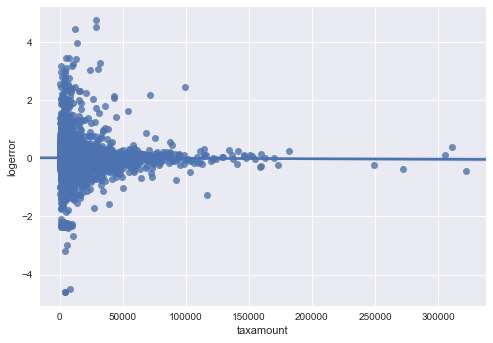

In [116]:
sns.regplot(x='taxamount',y='logerror',data=df_train)


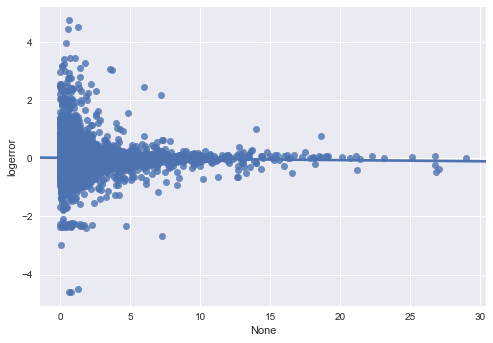

In [120]:
ratio4=df_train['taxamount']/df_train['lotsizesquarefeet']
sns.regplot(x=ratio4,y='logerror',data=df_train)

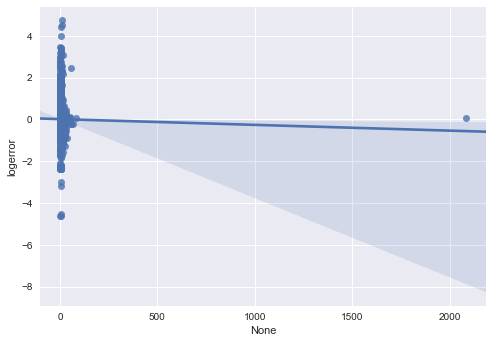

In [122]:
ratio5=df_train['taxamount']/df_train['finishedsquarefeet12']
sns.regplot(x=ratio5,y='logerror',data=df_train)

### Bedroom Vs Bathroom count

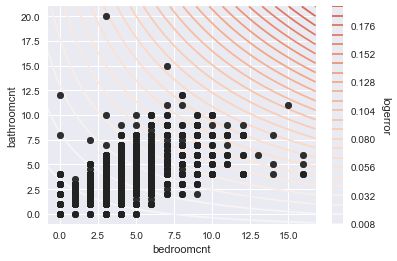

In [21]:
sns.interactplot(x1='bedroomcnt', x2='bathroomcnt',y='logerror',data=df_train);

### Identify Feature Importance

In [9]:
from sklearn import model_selection, preprocessing
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

mergedFilterd = org.fillna(-999)
for f in mergedFilterd.columns:
    if mergedFilterd[f].dtype=='object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(mergedFilterd[f].values)) 
        mergedFilterd[f] = lbl.transform(list(mergedFilterd[f].values))
        
train_y = mergedFilterd.logerror.values
train_X = mergedFilterd.drop(["parcelid", "transactiondate", "logerror","errrange"], axis=1)

xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)

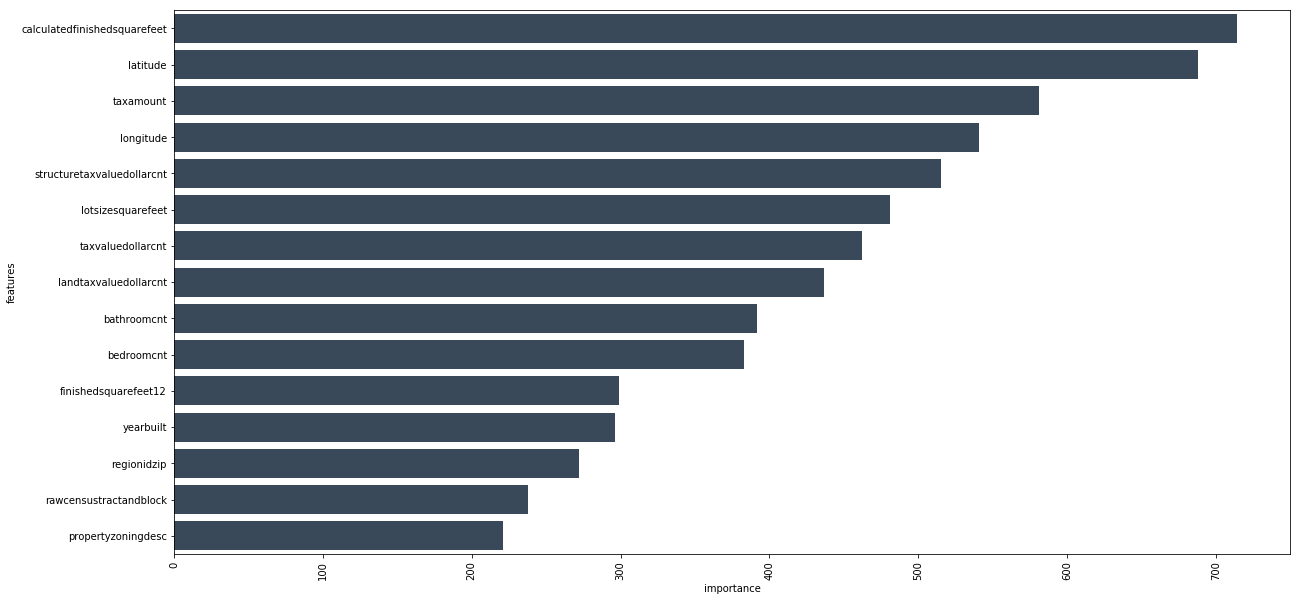

In [10]:
featureImportance = model.get_fscore()
features = pd.DataFrame()
features['features'] = featureImportance.keys()
features['importance'] = featureImportance.values()
features.sort_values(by=['importance'],ascending=False,inplace=True)
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
plt.xticks(rotation=90)
sns.barplot(data=features.head(15),x="importance",y="features",ax=ax,orient="h",color="#34495e");
plt.savefig('Top 15 features.png')